<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#GradCam" data-toc-modified-id="GradCam-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GradCam</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ensemble</a></span></li></ul></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ensemble</a></span></li></ul></li><li><span><a href="#GradCam-+-SmoothGrad" data-toc-modified-id="GradCam-+-SmoothGrad-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>GradCam + SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')

from saliency.attribution_methods import GradCAM
from saliency.ensembles import *
from utils import get_samples, visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


In [4]:
layers = ['Conv1','BatchNorm1','ReLU1','MaxPool1','Conv2','BatchNorm2','ReLU2','MaxPool2','Conv3','BatchNorm3','ReLU3','MaxPool3']

# GradCam

In [5]:
GC_mnist = GradCAM(mnist_model)
GC_cifar10 = GradCAM(cifar10_model)

# MNIST

In [6]:
outputs_layer = []

for layer_idx in range(len(layers)):
    outputs, probs, preds = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=layer_idx)
    outputs_layer.append(outputs)

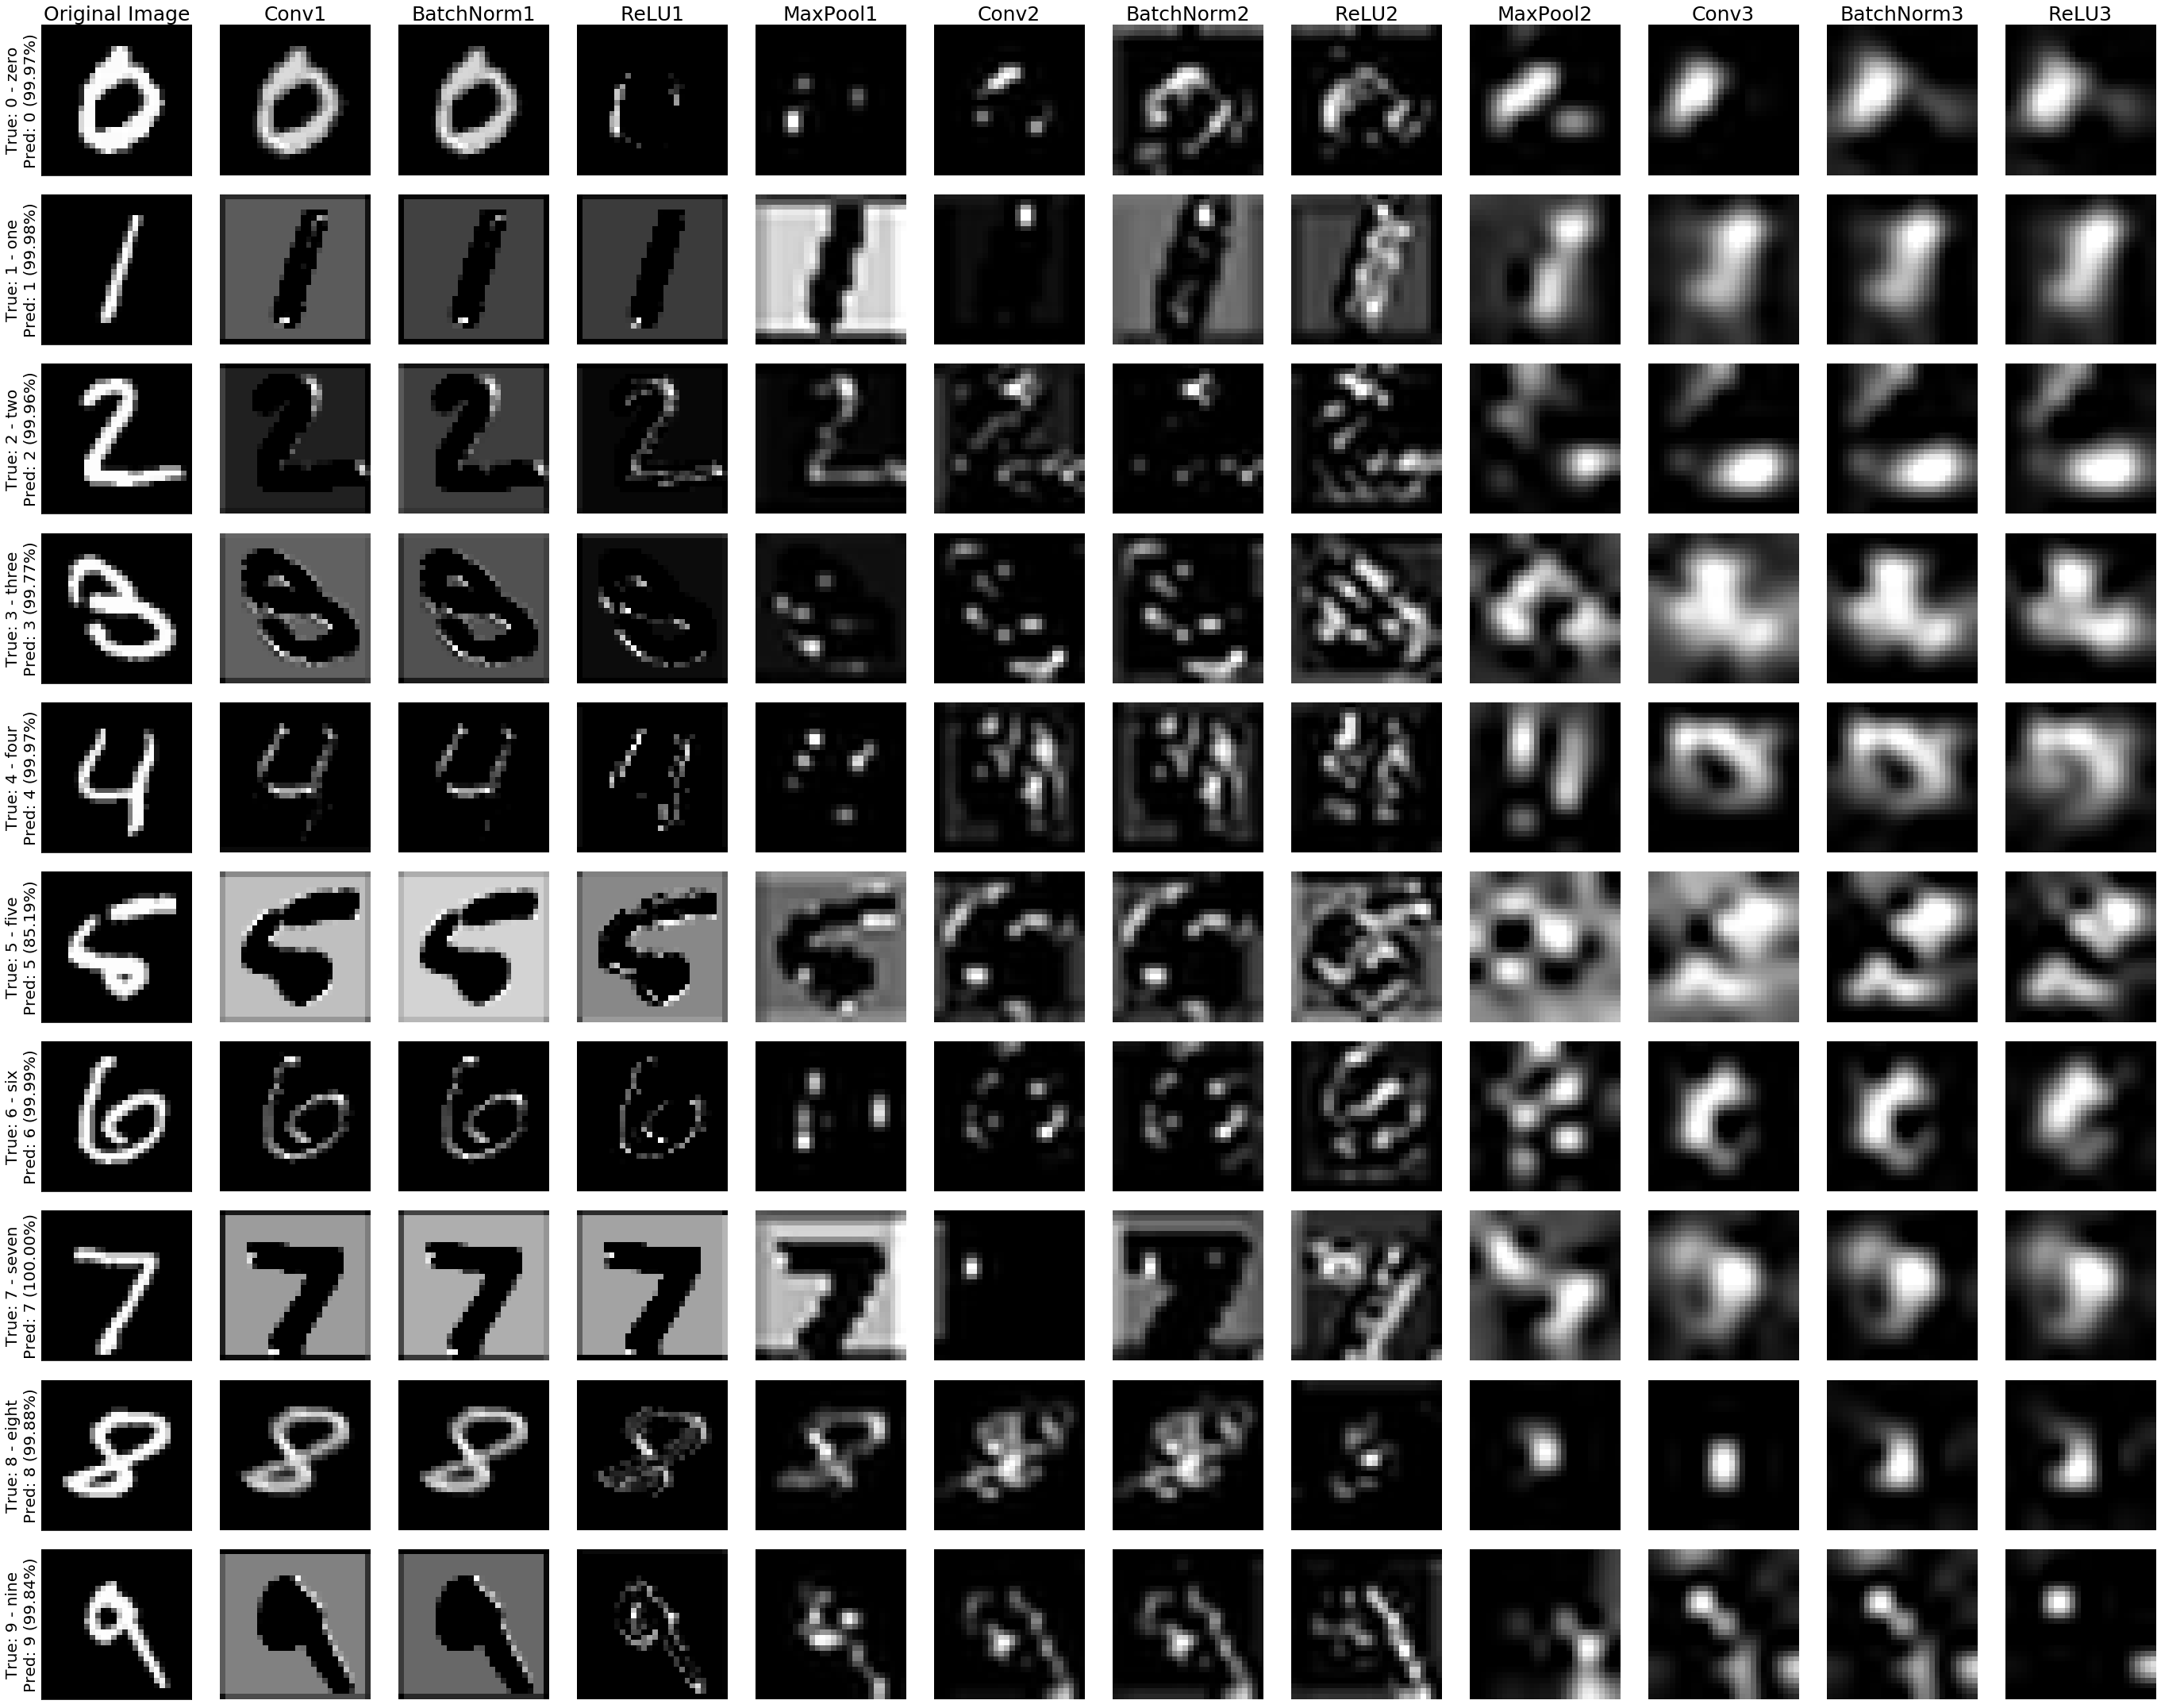

In [7]:
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    outputs_layer,
                    probs,
                    preds,
                    mnist_classes,
                    layers,
                    target,
                    col=len(layers), row=10, size=(40,30), labelsize=20, fontsize=25)

## Ensemble

In [8]:
# vanilla gradients
outputs, probs, preds = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=8)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)

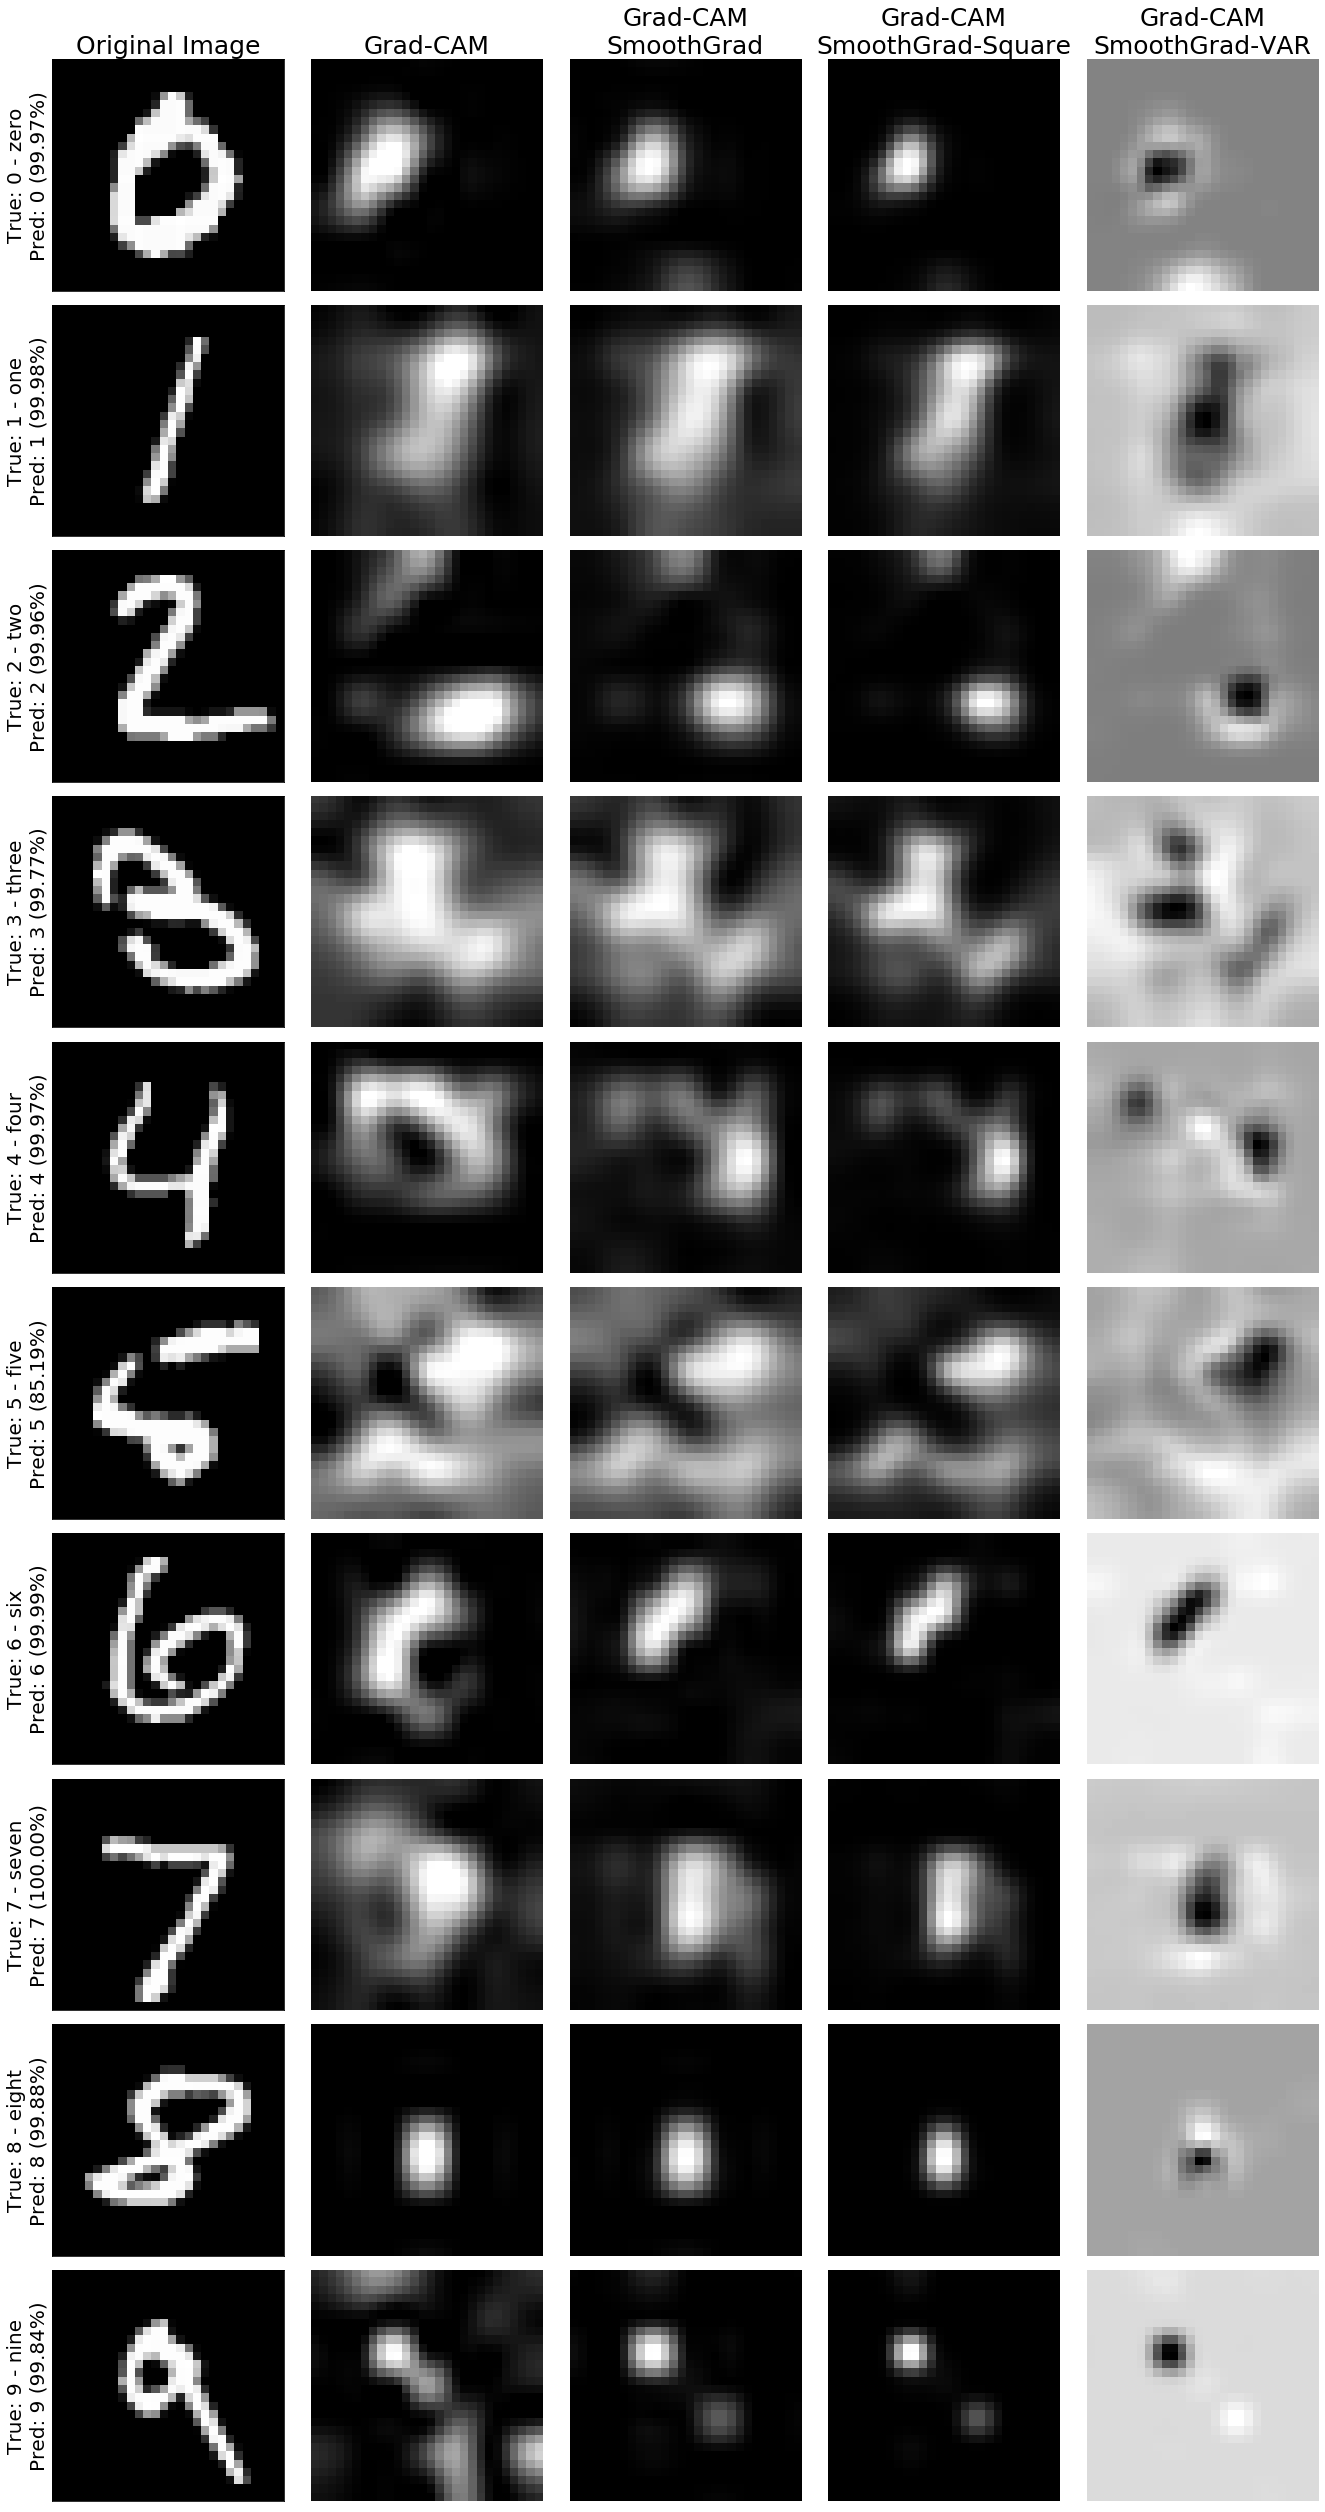

In [9]:
names = ['Grad-CAM',
         'Grad-CAM\nSmoothGrad','Grad-CAM\nSmoothGrad-Square','Grad-CAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [10]:
outputs_layer = []

for layer_idx in range(len(layers)):
    outputs, probs, preds = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=layer_idx, color=True)
    outputs_layer.append(outputs)

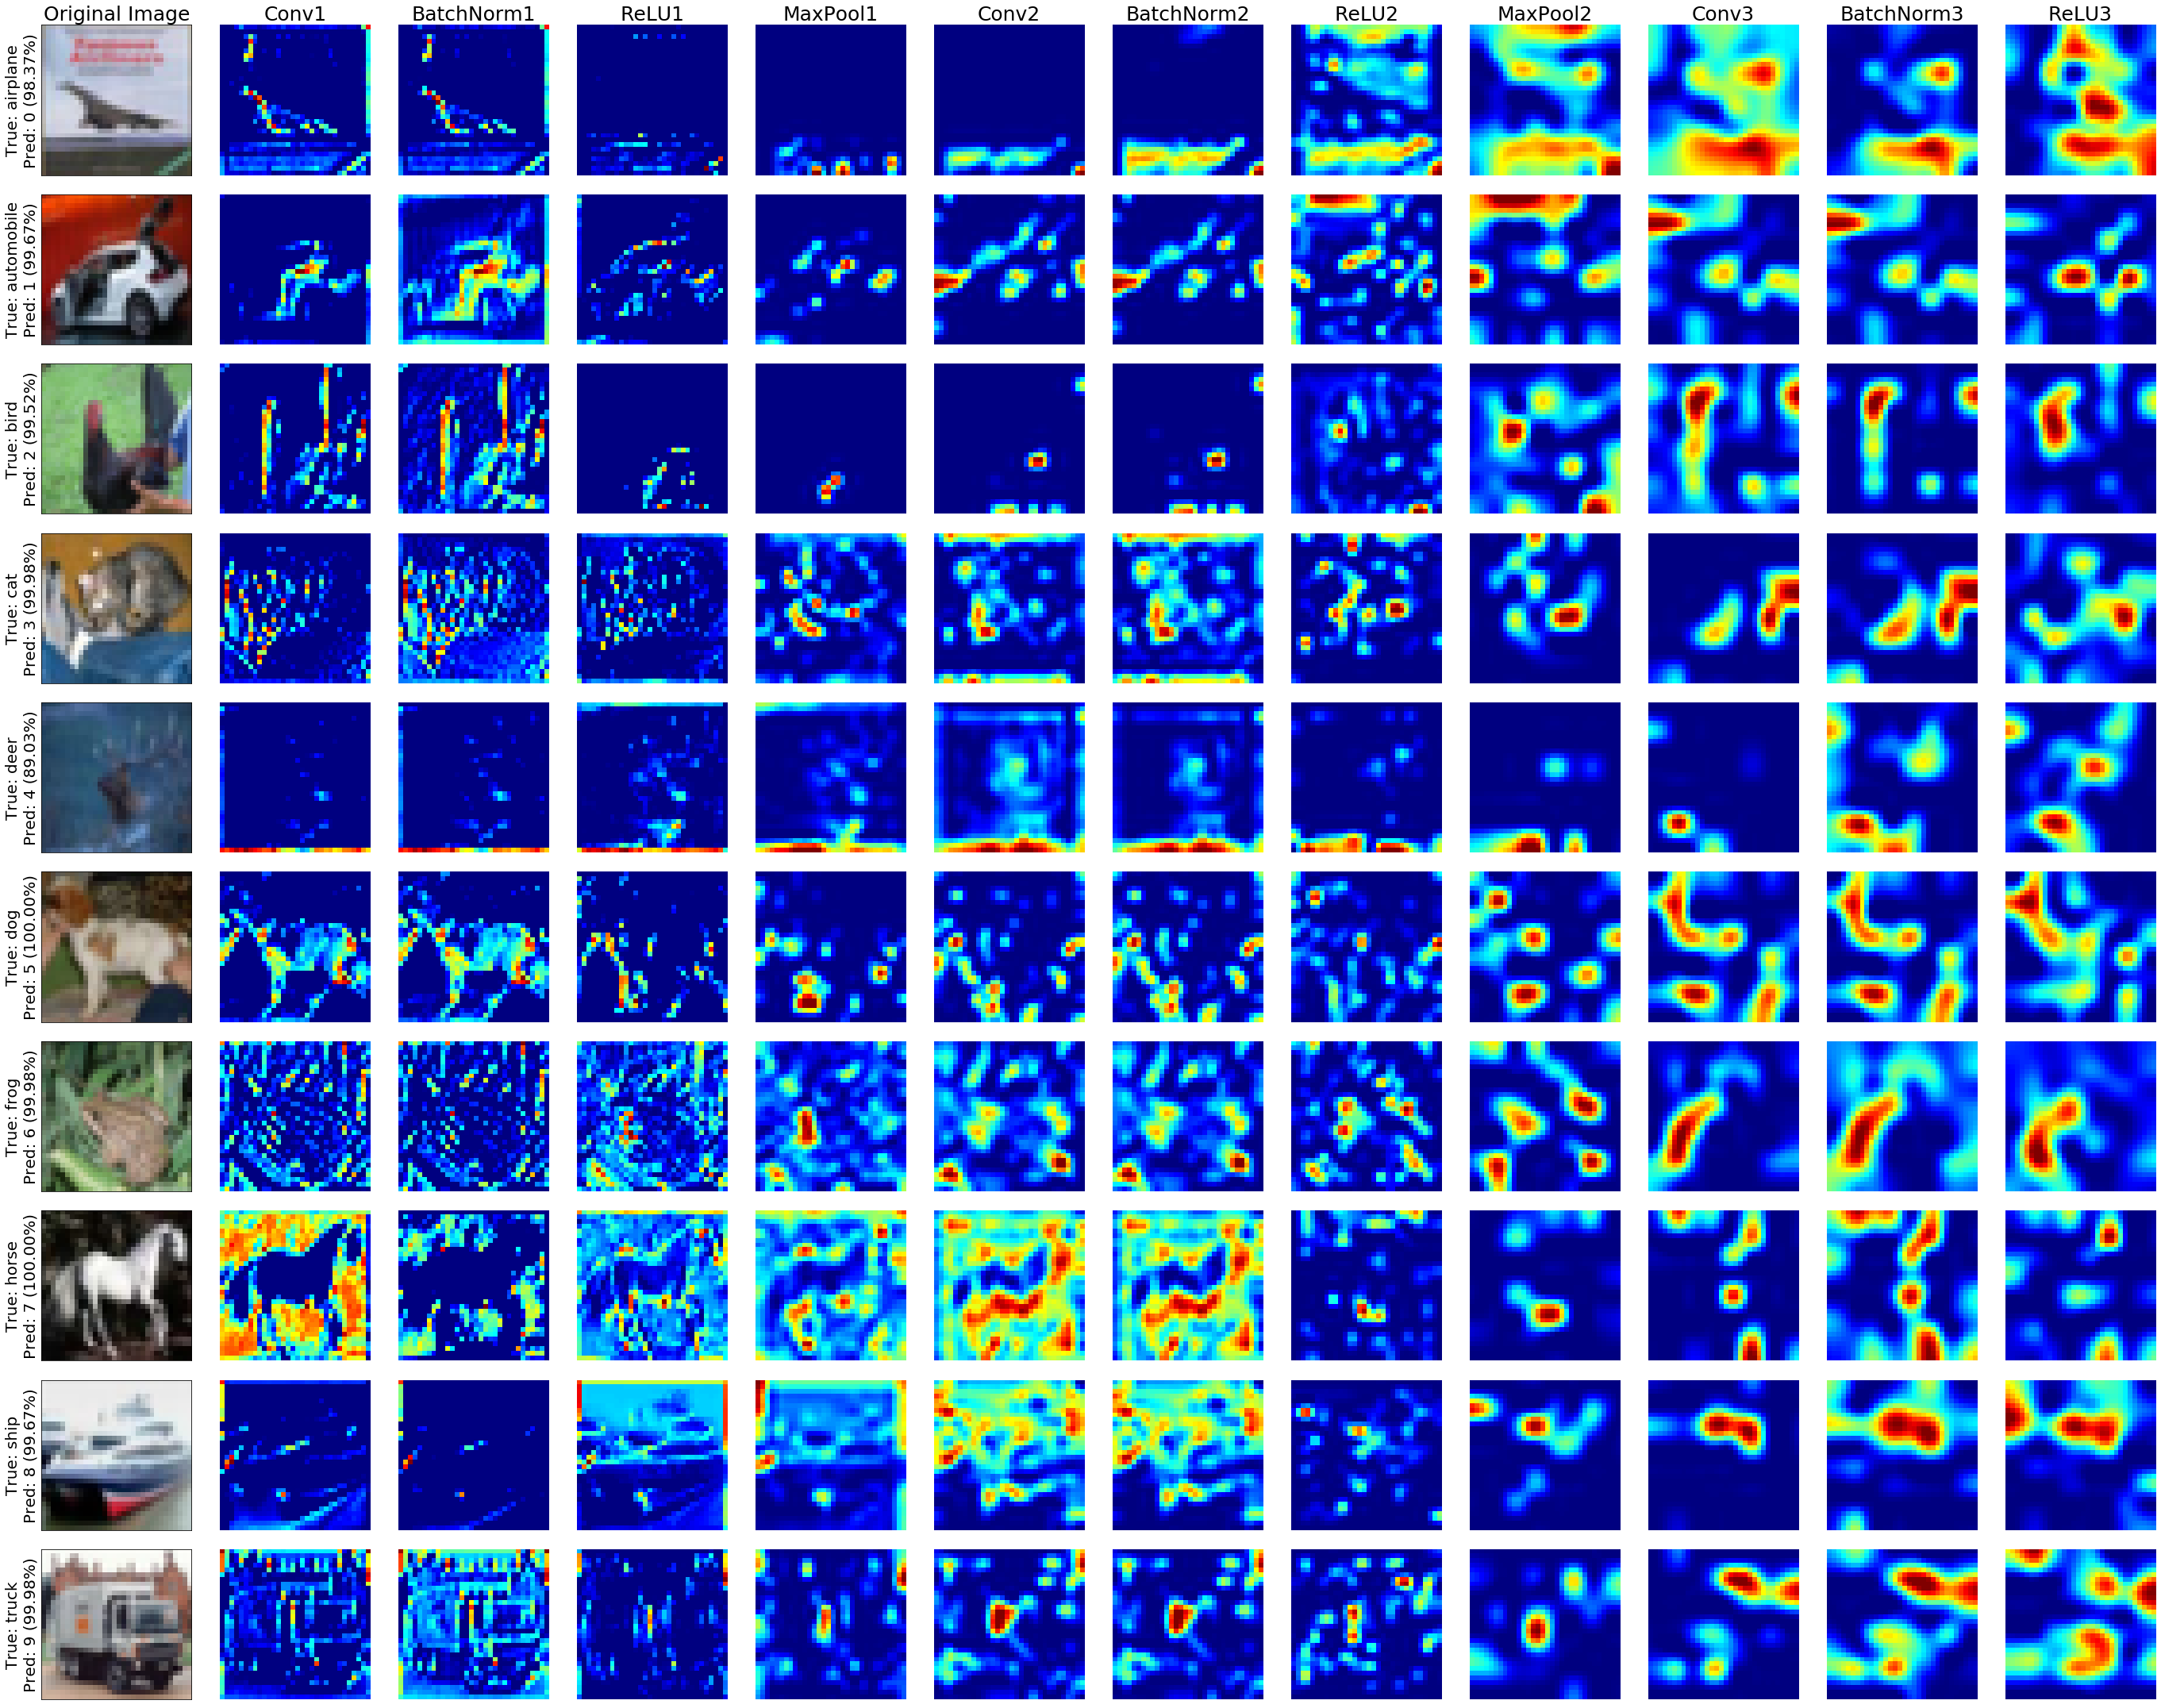

In [11]:
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    outputs_layer,
                    probs,
                    preds,
                    cifar10_classes,
                    layers,
                    target,
                    col=len(layers), row=10, size=(40,30), labelsize=20, fontsize=25)

## Ensemble

In [12]:
# vanilla gradients
outputs, probs, preds = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=8, color=True)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)

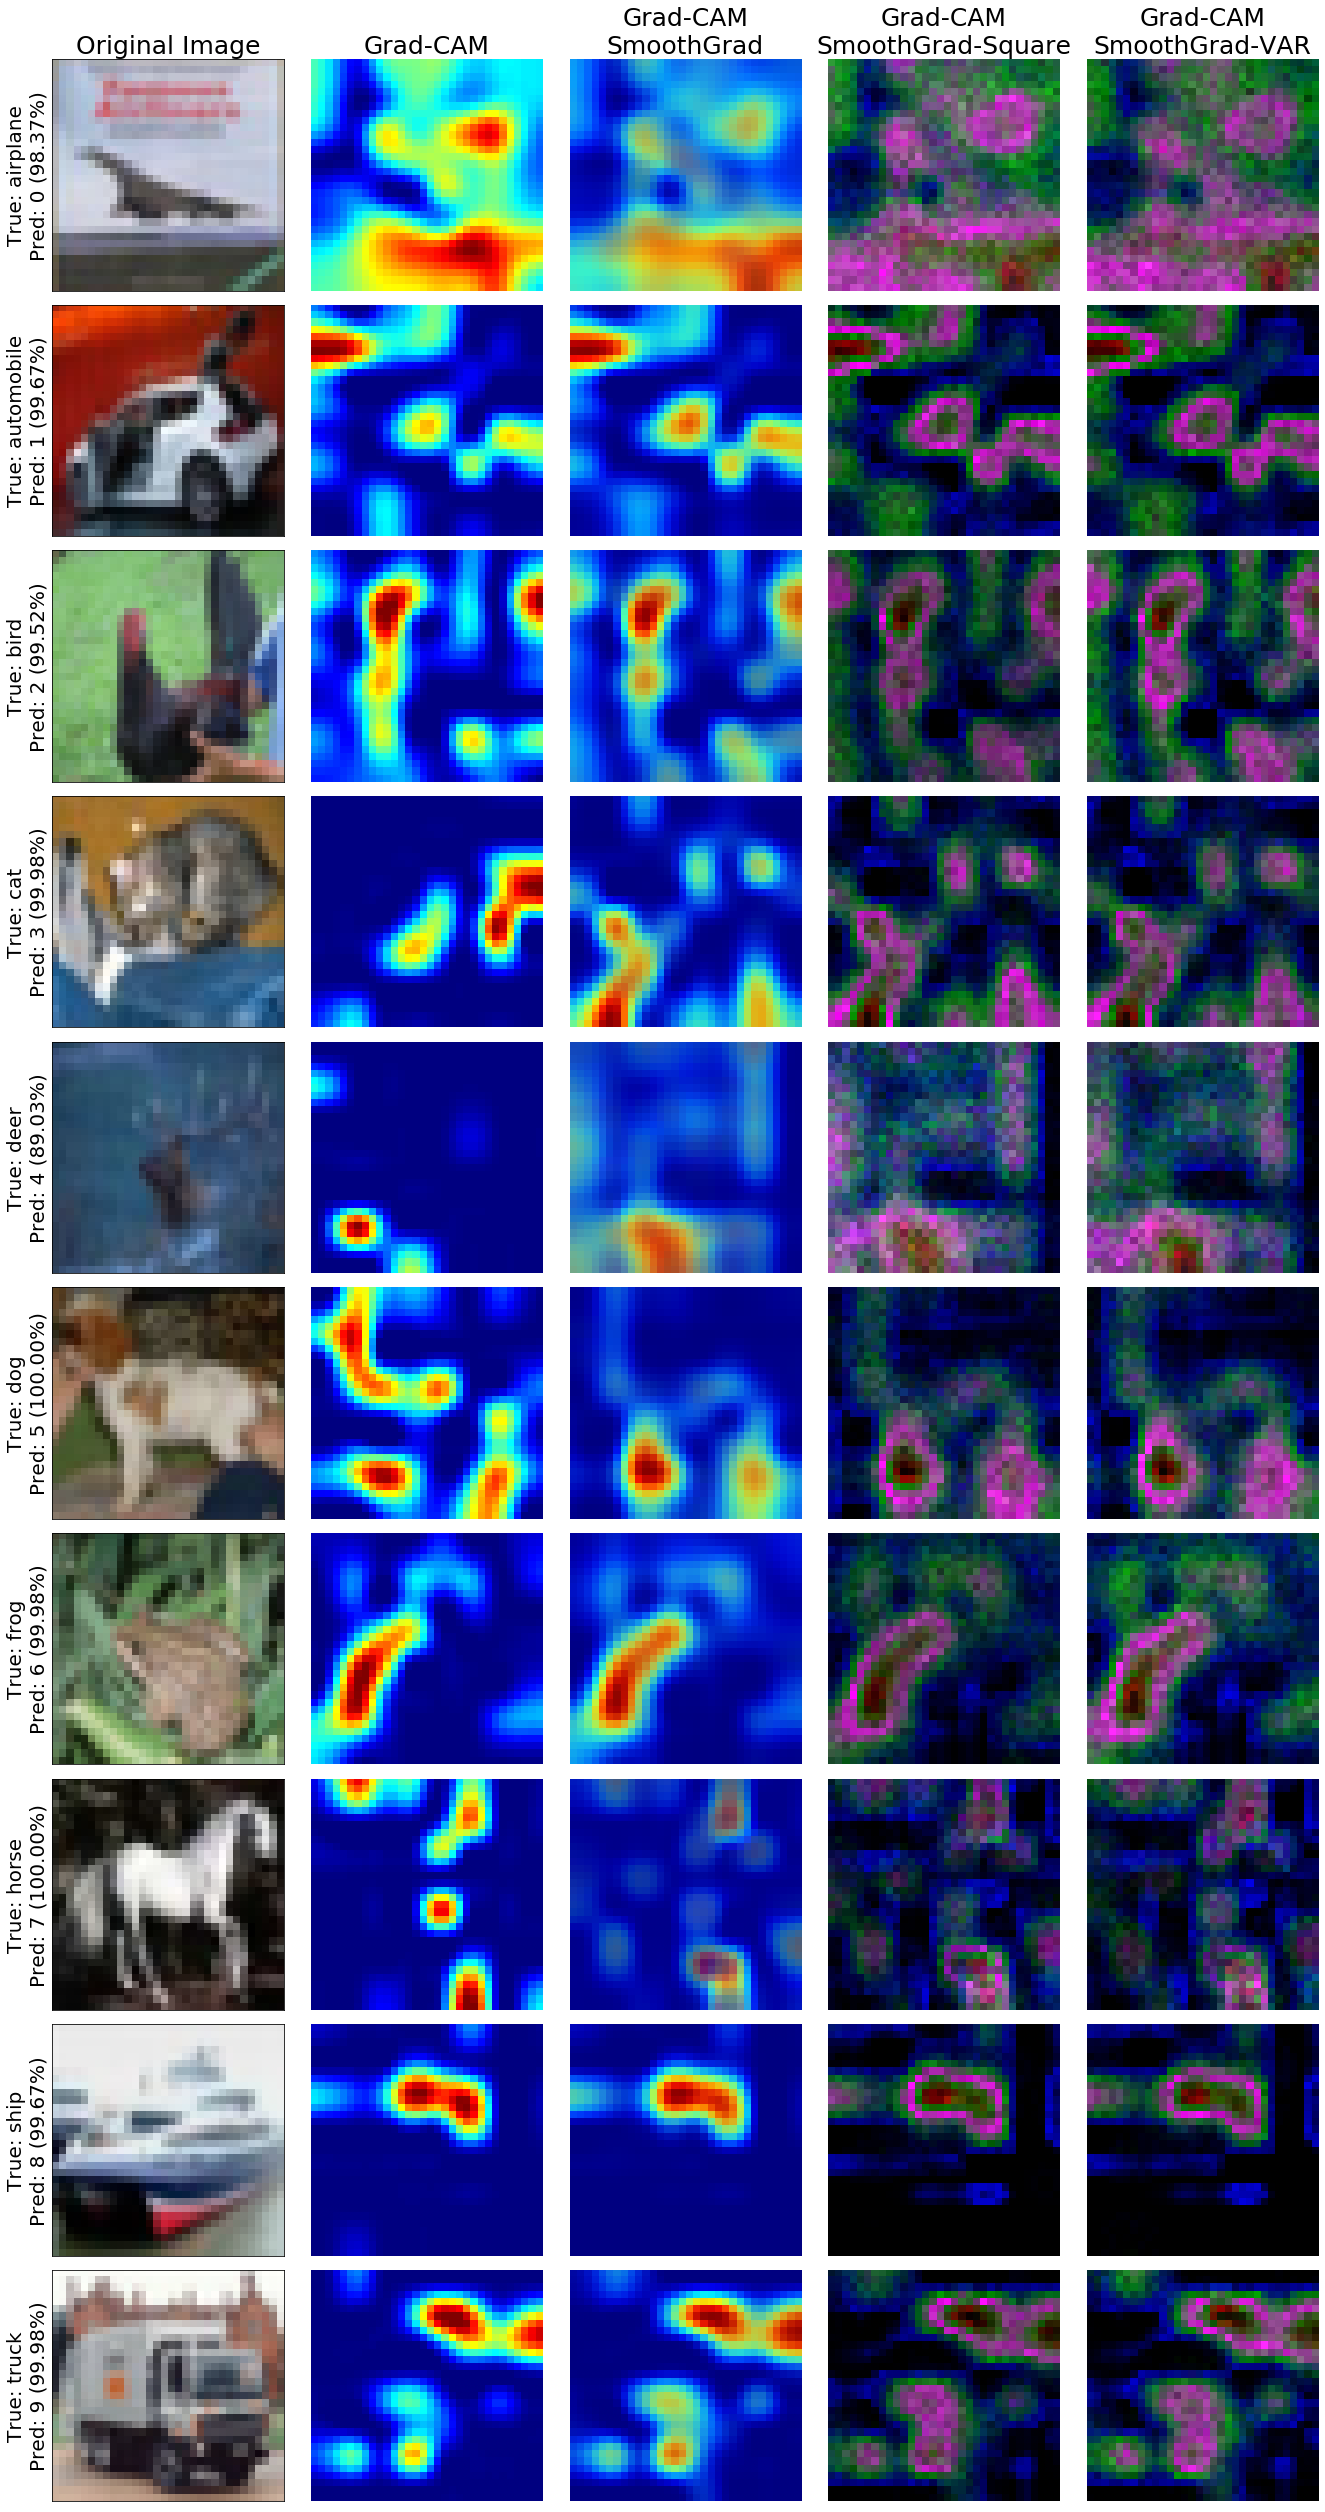

In [13]:
names = ['Grad-CAM',
         'Grad-CAM\nSmoothGrad','Grad-CAM\nSmoothGrad-Square','Grad-CAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)